# Feature extraction code
## Imports

In [3]:
import sys
import os
import datetime
import gpm # type: ignore
import numpy as np 
import pandas as pd 
import ximage  # noqa 
from matplotlib import pyplot as plt 
from gpm.io.local import get_local_filepaths # type: ignore

In [4]:
PACKAGE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
OUTPUT_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

if PACKAGE_DIR not in sys.path:
    sys.path.insert(0, PACKAGE_DIR)

from gpm_storm.features.image import calculate_image_statistics

## Download data
### Time period & Product info

In [5]:
start_time = datetime.datetime.strptime("2023-08-20 20:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2023-08-22 00:00:00", "%Y-%m-%d %H:%M:%S")

product = "2A-DPR"  # GPM DPR Level 2A product (Dual-frequency Precipitation Radar)
product_type = "RS"
version = 7

In [6]:
gpm.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)

All the available GPM 2A-DPR product files are already on disk.


## Define Variables of Interest

In [7]:
variables = [
    "sunLocalTime",
    "airTemperature",
    "precipRate",
    "paramDSD",
    "zFactorFinal",
    "zFactorMeasured",
    "precipRateNearSurface",
    "precipRateESurface",
    "precipRateESurface2",
    "zFactorFinalESurface",
    "zFactorFinalNearSurface",
    "heightZeroDeg",
    "binEchoBottom",
    "landSurfaceType",
]

### Load data files

In [8]:
#If working with all of the locally downloaded files working with the granule 
""" filepath_list = get_local_filepaths(product, version=version, product_type=product_type)
filepath_2023 = [fp for fp in filepath_list if "/2023/" in fp]

for filepath in filepath_2023:
    ds = gpm.open_granule(filepath, variables=variables, scan_mode="FS") """

' filepath_list = get_local_filepaths(product, version=version, product_type=product_type)\nfilepath_2023 = [fp for fp in filepath_list if "/2023/" in fp]\n\nfor filepath in filepath_2023:\n    ds = gpm.open_granule(filepath, variables=variables, scan_mode="FS") '

In [9]:
ds = gpm.open_dataset(
        product=product,
        product_type=product_type,
        version=version,
        start_time=start_time,
        end_time=end_time,
        variables=variables,
        prefix_group=False,
    )
ds

'scan_mode' has not been specified. Default to FS.


<xarray.Dataset> Size: 50GB
Dimensions:                  (cross_track: 49, along_track: 144002, range: 176,
                              radar_frequency: 2, DSD_params: 2)
Coordinates: (12/16)
    sunLocalTime             (cross_track, along_track) float32 28MB dask.array<chunksize=(49, 7964), meta=np.ndarray>
    height                   (cross_track, along_track, range) float32 5GB dask.array<chunksize=(49, 7964, 176), meta=np.ndarray>
    SCorientation            (along_track) float32 576kB dask.array<chunksize=(7964,), meta=np.ndarray>
    dataQuality              (along_track, radar_frequency) float32 1MB dask.array<chunksize=(7964, 2), meta=np.ndarray>
    lon                      (cross_track, along_track) float32 28MB 117.4 .....
    lat                      (cross_track, along_track) float32 28MB -52.61 ....
    ...                       ...
    gpm_along_track_id       (along_track) int64 1MB ...
  * range                    (range) int64 1kB 1 2 3 4 5 ... 172 173 174 175 176
    gpm_range_id             (range) int64 1kB ...
  * radar_frequency          (radar_frequency) <U2 16B 'Ku' 'Ka'
  * DSD_params               (DSD_params) <U2 16B 'Nw' 'Dm'
    crsWGS84                 int64 8B 0
Dimensions without coordinates: cross_track, along_track
Data variables: (12/15)
    precipRateESurface2      (cross_track, along_track) float32 28MB dask.array<chunksize=(49, 7964), meta=np.ndarray>
    landSurfaceType          (cross_track, along_track) float64 56MB dask.array<chunksize=(49, 7964), meta=np.ndarray>
    zFactorMeasured          (cross_track, along_track, range, radar_frequency) float32 10GB dask.array<chunksize=(49, 7964, 176, 2), meta=np.ndarray>
    binEchoBottom            (cross_track, along_track) float32 28MB dask.array<chunksize=(49, 7964), meta=np.ndarray>
    precipRate               (cross_track, along_track, range) float32 5GB dask.array<chunksize=(49, 7964, 176), meta=np.ndarray>
    precipRateESurface       (cross_track, along_track) float32 28MB dask.array<chunksize=(49, 7964), meta=np.ndarray>
    ...                       ...
    zFactorFinalNearSurface  (cross_track, along_track, radar_frequency) float32 56MB dask.array<chunksize=(49, 7964, 2), meta=np.ndarray>
    airTemperature           (cross_track, along_track, range) float32 5GB dask.array<chunksize=(49, 7964, 176), meta=np.ndarray>
    heightZeroDeg            (cross_track, along_track) float32 28MB dask.array<chunksize=(49, 7964), meta=np.ndarray>
    dBNw                     (cross_track, along_track, range) float32 5GB dask.array<chunksize=(49, 7964, 176), meta=np.ndarray>
    Dm                       (cross_track, along_track, range) float32 5GB dask.array<chunksize=(49, 7964, 176), meta=np.ndarray>
    Nw                       (cross_track, along_track, range) float32 5GB dask.array<chunksize=(49, 7964, 176), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20230820-S183436-E200708.05...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2025-03-13 0...
    gpm_api_product:       2A-DPR

/home/gamal/micromamba/envs/gpm-api-dev-py311/lib/python3.11/site-packages/dask/array/reductions.py:655: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


## Storm Labeling

In [10]:
min_value_threshold = 0.05
max_value_threshold = np.inf
min_area_threshold = 5
max_area_threshold = np.inf
footprint = 5
sort_by = "area"
sort_decreasing = True
label_name = "label"
da = ds["precipRateNearSurface"].compute()

The array currently contains 1120 labels and 'max_n_labels'
            is set to 50. The colorbar is not displayed!


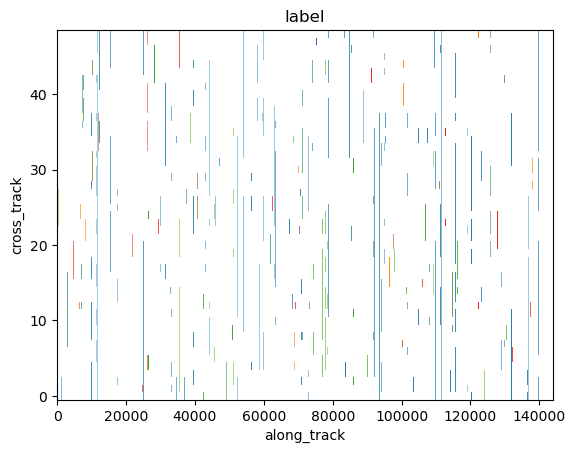

In [11]:
xr_obj = da.ximage.label(
    min_value_threshold=min_value_threshold,
    max_value_threshold=max_value_threshold,
    min_area_threshold=min_area_threshold,
    max_area_threshold=max_area_threshold,
    footprint=footprint,
    sort_by=sort_by,
    sort_decreasing=sort_decreasing,
    label_name=label_name,
)
# Plot full label array
xr_obj[label_name].ximage.plot_labels()

## Patch extraction

In [12]:
patch_size = (49, 20)
n_patches = 50
label_name = "label"
highlight_label_id = False
labels_id = None
n_labels = None
centered_on = "label_bbox"
padding = 0
variable = "precipRateNearSurface"

In [13]:
# Define the patch generator
label_isel_dict = xr_obj.ximage.label_patches_isel_dicts(
    label_name=label_name,
    patch_size=patch_size,
    variable=variable,
    n_patches=n_patches,
    n_labels=n_labels,
    labels_id=labels_id,
    padding=padding,
    centered_on=centered_on,
    partitioning_method=None,
    debug=False,
)

## Patch Stats

In [14]:
ds["zFactorFinal"] = ds["zFactorFinal"].compute()
ds["precipRateNearSurface"] = ds["precipRateNearSurface"].compute()
ds["sunLocalTime"] = ds["sunLocalTime"].compute()

In [17]:
patch_statistics = [
    calculate_image_statistics(ds, label_isel_dict[i][0]) for i in range(1, n_patches)
]

/home/gamal/micromamba/envs/gpm-api-dev-py311/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gamal/micromamba/envs/gpm-api-dev-py311/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/gamal/micromamba/envs/gpm-api-dev-py311/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gamal/micromamba/envs/gpm-api-dev-py311/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/gamal/micromamba/envs/gpm-api-dev-py311/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gamal/micromamba/env

### Save results as Parquet

In [28]:
file_path = os.path.join(OUTPUT_DIR, "patch_statistics")
df = pd.DataFrame(patch_statistics)
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%f')
df.to_parquet(file_path)

print(f"Saved features to: {file_path}")

Saved features to: /home/gamal/gpm_storm/data/patch_statistics
